In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import sqlite3    ## SQL Interface
import pickle     ## Used to save your data - Converts objects to byte stream and vice versa

from sklearn.feature_extraction.text import CountVectorizer  ## BOW Model

In [4]:
from sklearn.utils import shuffle

### read updated sql file

In [2]:
conn = sqlite3.connect('balanced.sqlite')
df = pd.read_sql_query("""SELECT * FROM Reviews""", conn)
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,CleanedText,CleanedSummary
0,537958,B000MTM0WK,A2ZRHMDYE6GM99,Tiffany Ge,0,1,positive,1306627200,Best Energy Drink,"This energy drink is great, no crash, taste go...",energi drink great crash tast good calori chea...,best energi drink
1,288451,B000ENUC3S,AC6Y1H8JUIOJB,R. Ian,0,0,positive,1176249600,"Larabar Bars, Cashew Cookie",Great tasting bar. Nice and soft make it easy ...,great tast bar nice soft make easi eat,larabar bar cashew cooki
2,328137,B001EO5KWY,A12FMFPEZ0V3B3,patc,0,0,positive,1337212800,Wonderful taste,I am trying to eat healthy and love a great ta...,tri eat healthi love great tast tuna product f...,wonder tast
3,544747,B001P3PR54,A1TS8QQYU3GY3R,Vickie L. Ray,0,0,positive,1322956800,My Chi's Love 'Em!,"My 2 Chihuahua's, 4 year old Penny and 1 year ...",chihuahua year old penni year bella louis love...,chis love
4,549478,B004VQ8OAC,A1YZF0PNRRTUK2,"C. Hadsell ""Kitchen Caper""",3,4,positive,1314662400,Delicious!!!!,This is one of my favorite Granolas. (Is that ...,one favorit granola even word thus ive ban hou...,delici


### shuffle the data frame

In [6]:
df = shuffle(df, random_state = 123, replace = True)
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,CleanedText,CleanedSummary
89116,274678,B001PIH3MY,A1DSD27BCHP8PK,"Greg Matthews ""microguy""",13,14,negative,1333497600,Contains a Form of MSG,The product labeling in my mind is a little de...,product label mind littl decept consid cracker...,contain form msg
5289,561004,B001SAW2ZM,A9J5NFCH5NN4E,Arnold A. Brevick,0,0,positive,1301097600,Great BBQ Sauce,Noh Foods Hawaiian BBQ Sauce is just the best ...,noh food hawaiian bbq sauc best know still mar...,great bbq sauc
95276,103987,B002TXF6AU,A2MUGFV2TDQ47K,"Lynrie ""Oh HELL no""",2,3,negative,1265500800,It's Just OK...,... IF this were not at a reduced price and wa...,not reduc price elig free ship wouldnt even tr...,
66020,1935,B000F4EU52,A2PNOU7NXB1JE4,"Peggy ""pab920""",14,17,negative,1153008000,Inside of can corroded,"After I enptied the can, I noticed it was blac...",enpti notic black area top appear corrod cours...,insid corrod
30739,383158,B001O8MPCI,A3JQYGGJ0W4HEX,STEPHEN D WOOD,1,1,positive,1339459200,Good quality quinoa,"This is good, tasty quinoa. The reason it's no...",good tasti quinoa reason not rate star requir ...,good qualiti quinoa


### creating BOW vector of raw Summary

In [8]:
bow_vec = CountVectorizer()
bow = bow_vec.fit_transform(df['Summary'].values)

In [9]:
bow.shape

(114220, 18422)

### creating BOW vector of cleaned summary

In [11]:
bow_vec = CountVectorizer()
bow = bow_vec.fit_transform(df['CleanedSummary'].values)
bow.shape

(114220, 13205)

In [13]:
type(bow)

scipy.sparse.csr.csr_matrix

### converting sparce matrix to array

In [17]:
vect = bow[:2000, :].toarray()

In [19]:
vect.shape

(2000, 13205)

### taking first 2000 rows of data frame

In [21]:
df1 = df.iloc[:2000,:]
df1.shape

(2000, 12)

In [22]:
df1['Score'].value_counts() #to check wheather the the data set is balanced or skrewed

positive    1004
negative     996
Name: Score, dtype: int64

function to convert positive as 1 and negative as 0

In [23]:
'''
function to convert positive as 1 and negative as 0
'''
def score(sc):
    if sc=='positive':
        return 1
    else:
        return 0

In [24]:
df1['Score']=df1['Score'].map(score) 

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [25]:
df1['Score'].value_counts() #to check whether all the scores are converted or not 

1    1004
0     996
Name: Score, dtype: int64

### taking time and score column fron data frame

In [42]:
df2 = df1[['Score','Time']]

In [50]:
a = [i for i in range(0,2000)]
df2 = df2.set_index([a])   # to change the index of data frame

In [51]:
df2.shape

(2000, 2)

In [52]:
df2.head()

,Score,Time
0,0,1333497600
1,1,1301097600
2,0,1265500800
3,0,1153008000
4,1,1339459200


### making data frame of BOW vector

In [30]:
vector = pd.DataFrame(list(vect))
vector.shape

(2000, 13205)

### concatenate BOW vector dataframe and score,time dataframe 

In [54]:
final_df=pd.concat([vector,df2],axis=1)
final_df.head(10)

,0,1,2,3,4,5,6,7,8,9,...,13197,13198,13199,13200,13201,13202,13203,13204,Score,Time
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1333497600
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1301097600
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1265500800
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1153008000
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1339459200
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1342656000
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1298764800
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1328745600
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1304294400
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1306368000


In [55]:
final_df.shape

(2000, 13207)

### sort on time

In [56]:
final_df.sort_values('Time',inplace=True)
final_df.head(10)

,0,1,2,3,4,5,6,7,8,9,...,13197,13198,13199,13200,13201,13202,13203,13204,Score,Time
1831,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1064361600
1818,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1082937600
860,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1094688000
1791,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1101772800
1718,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1118620800
1490,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1121040000
1961,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1122163200
1063,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1126569600
1776,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1135814400
502,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1140048000


In [57]:
final_df['Score'].value_counts()

1    1004
0     996
Name: Score, dtype: int64

### Extracting BOW vect in one variable and Score in another

In [58]:
x = final_df.iloc[:,:13205].values
y = final_df.iloc[:,13205].values

In [59]:
print(x.shape)
y.shape

(2000, 13205)


(2000,)

In [60]:
type(x)

numpy.ndarray

### column standardization

In [64]:
from sklearn.preprocessing import StandardScaler

In [65]:
a=StandardScaler()
x=a.fit_transform(x)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [68]:
x[:5]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

### Splitting data into training and testing

30% data in test and 70% data in train

In [69]:
x_train=x[:1400,:]
x_test=x[1400:,:]
y_train=y[:1400]
y_test=y[1400:]

In [71]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(1400, 13205) (1400,)
(600, 13205) (600,)


## KNN

In [74]:
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.colors import ListedColormap
from sklearn.metrics import accuracy_score
%matplotlib inline

In [72]:
def knn_decision_surface(X_set, y_set, classifier, k):

    cmap_light = ListedColormap(['#FFAAAA',  '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#0000FF'])

    resolution=0.01

    x1_min, x1_max = X_set[:, 0].min() - 1, X_set[:, 0].max() + 1
    x2_min, x2_max = X_set[:, 1].min() - 1, X_set[:, 1].max() + 1

    X1, X2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))

    Z = classifier.predict(np.array([X1.ravel(), X2.ravel()]).T)
    Z = Z.reshape(X1.shape)

    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())

    plt.contourf(X1, X2, Z, alpha=0.4, cmap=cmap_light)
    plt.scatter(X_set[:, 0], X_set[:, 1], c=y_set, cmap=cmap_bold)

    plt.title('K-NN (K = {})'.format(k))
    plt.xlabel('Age')
    plt.ylabel('Estimated Salary')
    plt.legend()
    plt.show()


The optimal number of neighbors is 5.


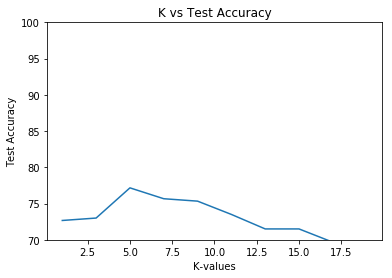

In [75]:
k_list = list(range(1,20,2))
acc_list = []
for k in k_list:
    classifier = KNeighborsClassifier(n_neighbors = k)
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)   
    acc_list.append(accuracy_score(y_test, y_pred, normalize=True) * float(100))
optimal_k = k_list[acc_list.index(max(acc_list))]
print('\nThe optimal number of neighbors is %d.' % optimal_k)
plt.plot(k_list, acc_list)
plt.xlabel('K-values')
plt.ylabel('Test Accuracy')
plt.title('K vs Test Accuracy')
plt.ylim(70, 100)
plt.show()

In [76]:
classifier = KNeighborsClassifier(n_neighbors = optimal_k)  
classifier.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [81]:
y_pred = classifier.predict(x_test)
#knn_decision_surface(x_test, y_test, classifier, optimal_k)

## Accuracy

In [82]:
acc = accuracy_score(y_test, y_pred, normalize=True) * float(100)
acc

77.16666666666666

## Confusion matrix

In [78]:
from sklearn.metrics import confusion_matrix

In [83]:
confusion_matrix(y_test, y_pred)

array([[248,  79],
       [ 58, 215]], dtype=int64)